<a href="https://colab.research.google.com/github/sirius70/Insurance-Dataset/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error # for␣evaluating ml models

Dataset

In [80]:
from google.colab import files
import pandas as pd

# Step 1: Upload the CSV
uploaded = files.upload()

# Step 2: Get the uploaded filename (first key)
filename = list(uploaded.keys())[0]

# Step 3: Read the CSV into a DataFrame
df = pd.read_csv(filename)



Saving insurance.csv to insurance (1).csv


In [81]:
# preview data - 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
df.tail()  # last 5 rows

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [83]:
df.info()  # info of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
# checking unique values
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [87]:
# checking duplicate values
df.duplicated().value_counts()

,count
False,1337


In [86]:
# droping duplicate values
df.drop_duplicates(inplace=True)

In [88]:
# rows, columns
df.shape

(1337, 7)

In [89]:
#rows*columns
df.size

9359

In [90]:
# helpful for numerical statistics
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Exploratory Data Analysis

Check for outliers

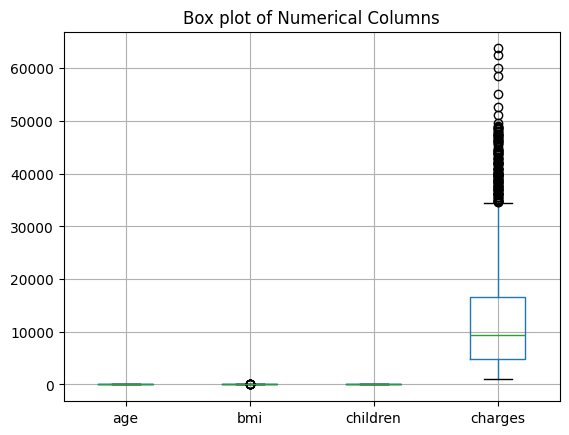

In [91]:
# Visualize box plots for numerical columns
df.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [92]:
# Handling outliers
# Remove outliers based on a specific threshold
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]  # keeping

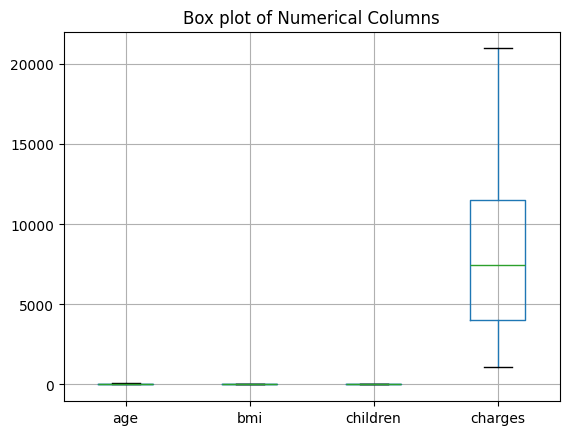

In [93]:
# visualize boxplot after removing outliers
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [94]:
# Get summary statistics
df_cleaned.describe()

,age,bmi,children,charges
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,38.371723,30.091910,1.076779,8159.150438
std,13.943164,5.856569,1.221375,4929.643963
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4038.478863
50%,38.000000,29.830000,1.000000,7441.277000
75%,50.000000,33.933750,2.000000,11539.380487
max,64.000000,45.900000,5.000000,20984.093600


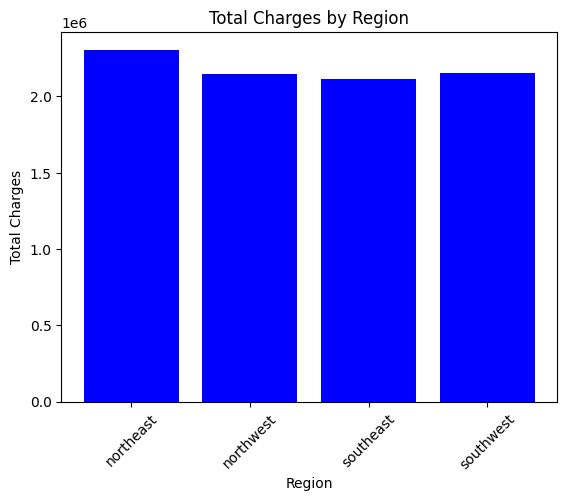

In [95]:
# Calculate the total charges by region
charges_by_region = df_cleaned.groupby('region')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='blue')

# Add labels and title
plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

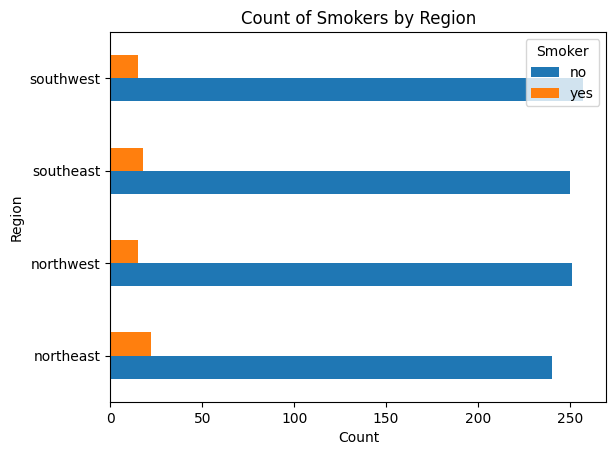

In [97]:
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

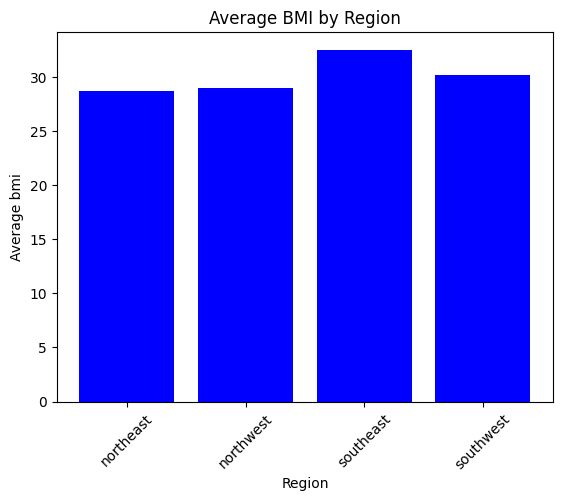

In [98]:
# Calculate the total charges by region
charges_by_region = df_cleaned.groupby('region')['bmi'].mean()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='blue')

# Add labels and title
plt.xlabel('Region')

plt.ylabel('Average bmi')
plt.title('Average BMI by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

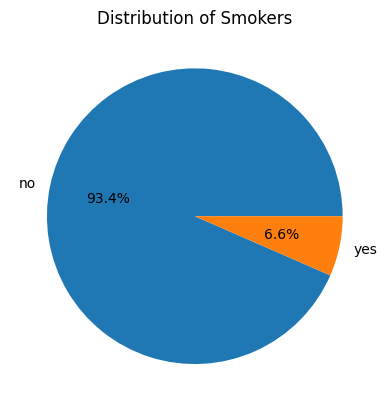

In [99]:
smoker_counts = df_cleaned['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Smokers')
plt.show()

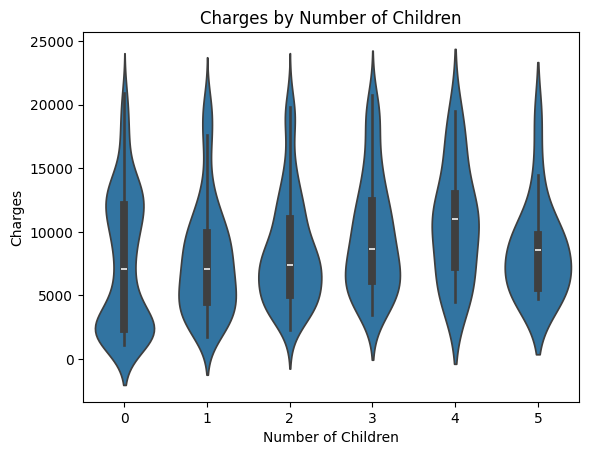

In [100]:
sns.violinplot(x=df_cleaned['children'], y=df_cleaned['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()

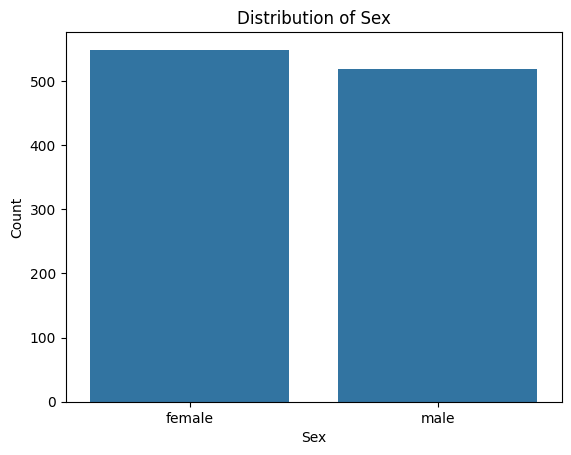

In [101]:
sns.countplot(x='sex', data=df_cleaned)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

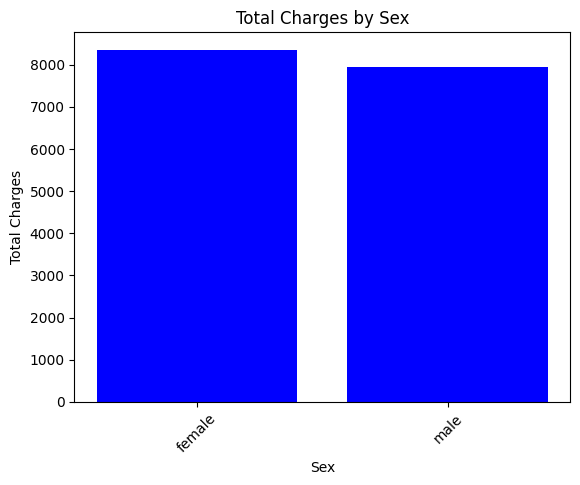

In [102]:
# Calculate the total charges by sex
charges_by_region = df_cleaned.groupby('sex')['charges'].mean()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='blue')

# Add labels and title
plt.xlabel('Sex')

plt.ylabel('Total Charges')
plt.title('Total Charges by Sex')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

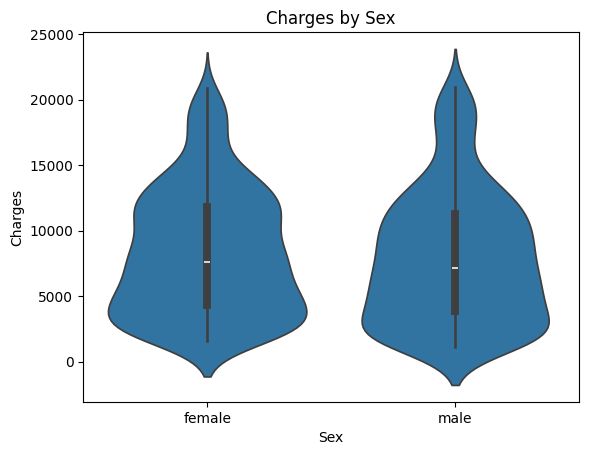

In [103]:
sns.violinplot(x=df_cleaned['sex'], y=df_cleaned['charges'])

plt.xlabel('Sex')
plt.ylabel('Charges')

plt.title('Charges by Sex')
plt.show()

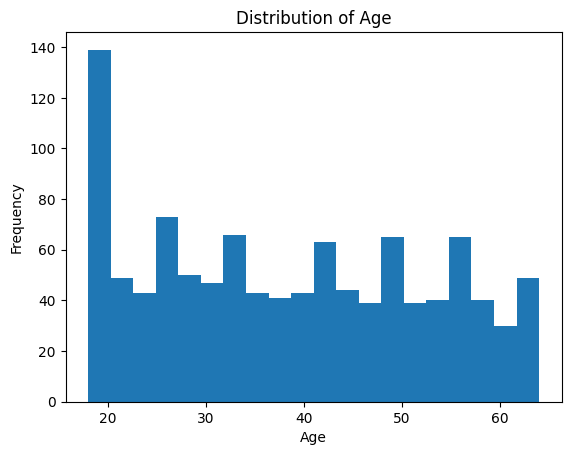

In [104]:
# distribution of age using histogram
df_cleaned['age'].plot(kind='hist', bins=20)

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.show()

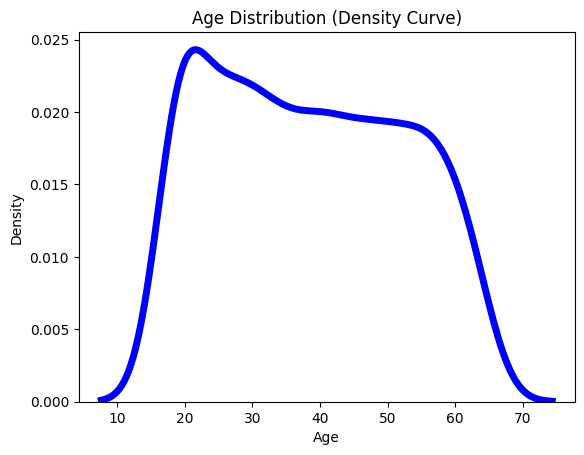

In [105]:
import seaborn as sns

sns.kdeplot(df_cleaned['age'], fill=False, color='blue', linewidth=5)
plt.xlabel('Age')
plt.title('Age Distribution (Density Curve)')
plt.show()


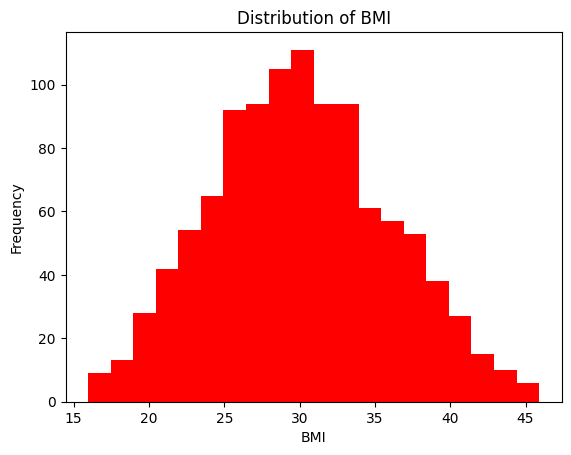

In [106]:
# distribution of BMI using histogram
df_cleaned['bmi'].plot(kind='hist', bins=20, color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

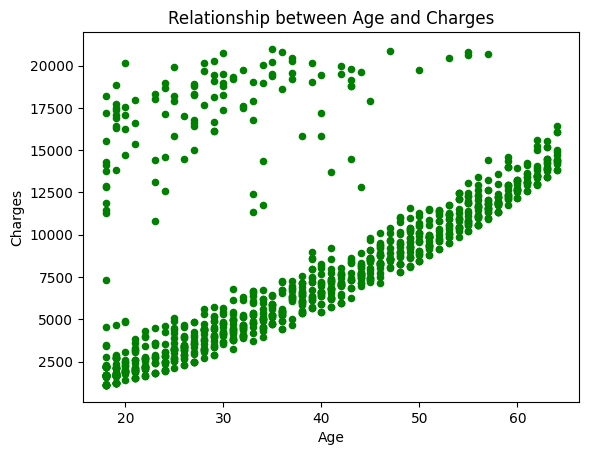

In [107]:
# relationship between age and charges using scatterplot
df_cleaned.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

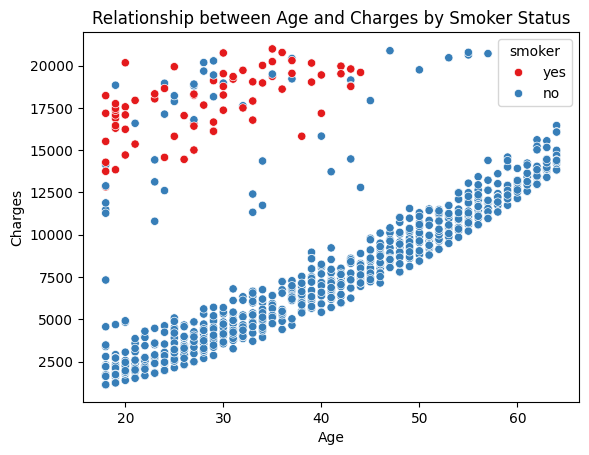

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_cleaned, x='age', y='charges', hue='smoker', palette='Set1')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges by Smoker Status')
plt.show()


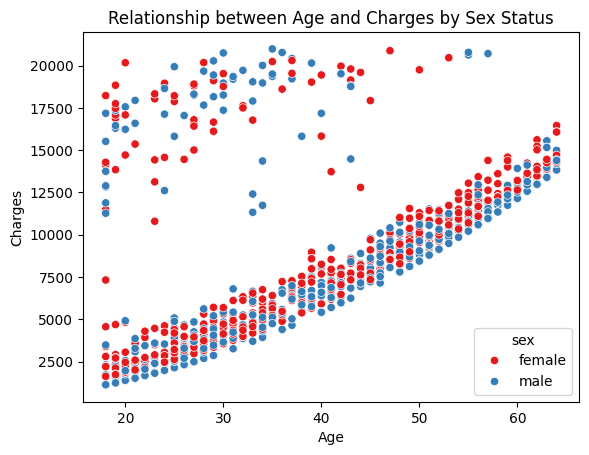

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_cleaned, x='age', y='charges', hue='sex', palette='Set1')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges by Sex Status')
plt.show()


There is a linearly increasing relationship between age and insurance charges. Older people are tend to be charged more

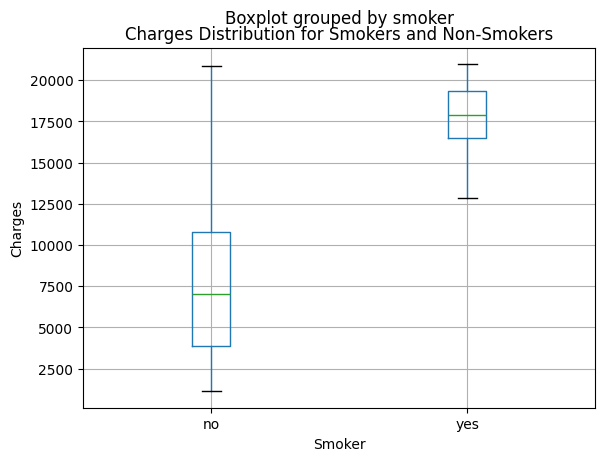

In [110]:
# charges distribution for smokers vs non-smokers using boxplot
df_cleaned.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

Unsurprisingly, smokers are charged way higher than non-smokers

Feature Engineering

Creating new feature such as Age groups

In [111]:
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df_cleaned.sample(5)

/tmp/ipython-input-3710811165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])


,age,sex,bmi,children,smoker,region,charges,age_group
90,21,female,39.49,0,no,southeast,2026.9741,Young
148,53,female,37.43,1,no,northwest,10959.6947,Middle-aged
1205,35,male,17.86,1,no,northwest,5116.5004,Adult
685,53,male,26.41,2,no,northeast,11244.3769,Middle-aged
1216,40,male,25.08,0,no,southeast,5415.6612,Adult


Feature encoding - Handling categorical variables

One-hot encoding for the 'region' column

In [112]:
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region', dtype=int)
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest
162,54,male,39.600,1,no,10450.55200,Middle-aged,0,0,0,1
889,57,male,33.630,1,no,11945.13270,Middle-aged,0,1,0,0
994,27,female,20.045,3,yes,16420.49455,Adult,0,1,0,0
360,48,female,32.300,2,no,10043.24900,Middle-aged,1,0,0,0
198,51,female,18.050,0,no,9644.25250,Middle-aged,0,1,0,0


Label encoding for the 'smoker', 'sex' column

In [113]:
label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
350,57,female,23.18,0,no,11830.6072,Middle-aged,0,1,0,0,0
88,46,female,27.74,0,no,8026.6666,Middle-aged,0,1,0,0,0
962,63,female,35.20,1,no,14474.6750,Senior,0,0,1,0,0
270,18,male,29.37,1,no,1719.4363,Young,0,0,1,0,0
939,53,male,29.48,0,no,9487.6442,Middle-aged,0,0,1,0,0


In [114]:
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
572,30,female,43.120,2,no,4753.63680,Adult,0,0,1,0,0,0
469,18,female,24.090,1,no,2201.09710,Young,0,0,1,0,0,0
902,26,male,27.265,3,no,4661.28635,Adult,1,0,0,0,0,1
1029,37,female,17.290,2,no,6877.98010,Adult,1,0,0,0,0,0
703,34,female,26.410,1,no,5385.33790,Adult,0,1,0,0,0,0


In [115]:
df_encoded = df_encoded[[x for x in df_encoded.columns if x not in ['smoker', 'sex']]]
df_encoded.sample(5)

,age,bmi,children,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
357,47,29.830,3,9620.33070,Middle-aged,0,1,0,0,0,1
1065,42,25.300,1,7045.49900,Middle-aged,0,0,0,1,0,0
532,59,29.700,2,12925.88600,Middle-aged,0,0,1,0,0,1
247,24,35.860,0,1986.93340,Young,0,0,1,0,0,1
165,47,28.215,4,10407.08585,Middle-aged,1,0,0,0,0,1


Correlation Analysis : Works only for numerical columns

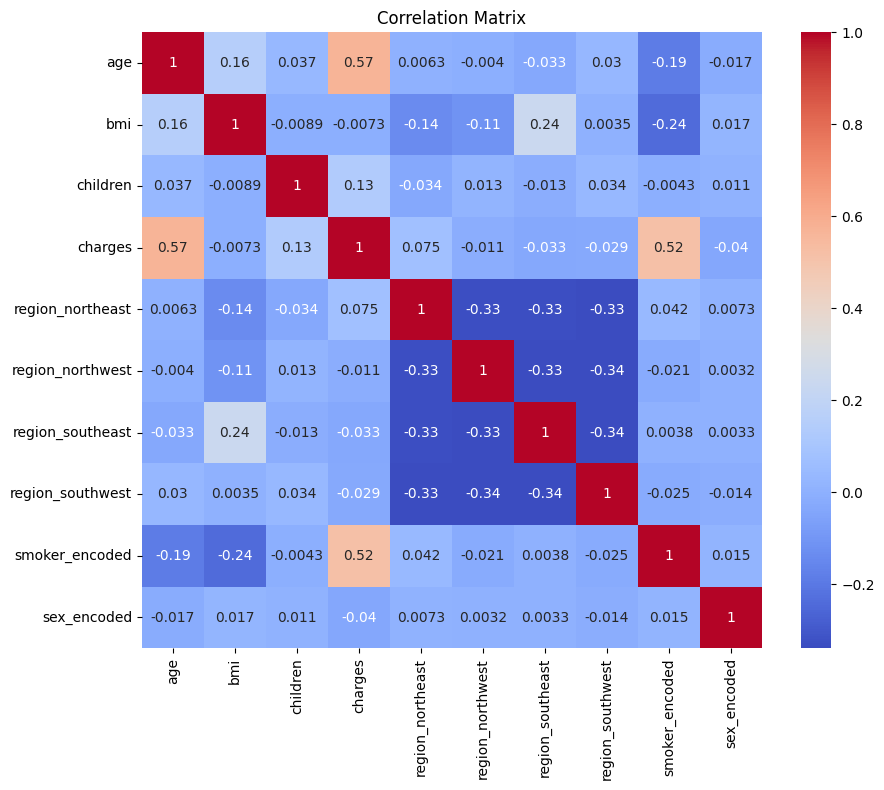

Relevant features based on correlation:
['age', 'smoker_encoded']


In [116]:
numr_cols = [x for x in df_encoded.columns if x not in ['age_group']]
corr_matrix = df_encoded[numr_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist()
print("Relevant features based on correlation:")
print(relevant_features)

Only age and smoking turned out to be relevant feature based on correlation analysis

**Modelling**

In [124]:
# Select the relevant features
X = df_encoded[['age', 'smoker_encoded']]
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

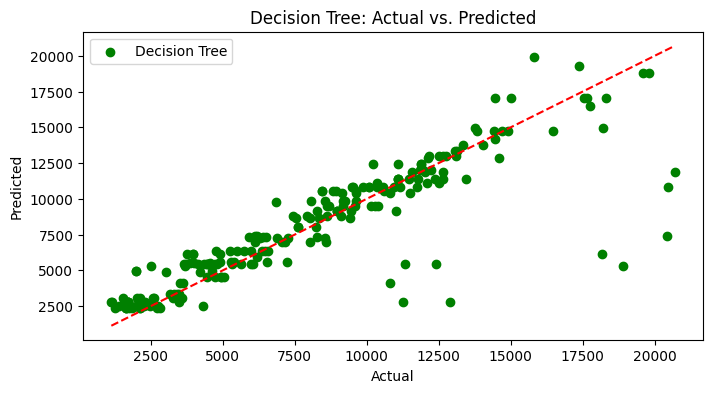

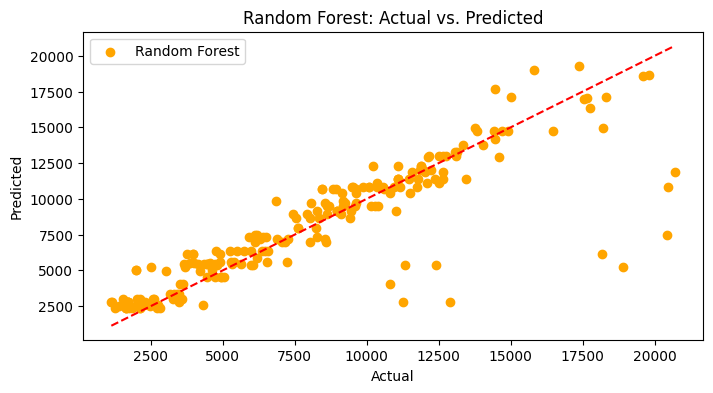

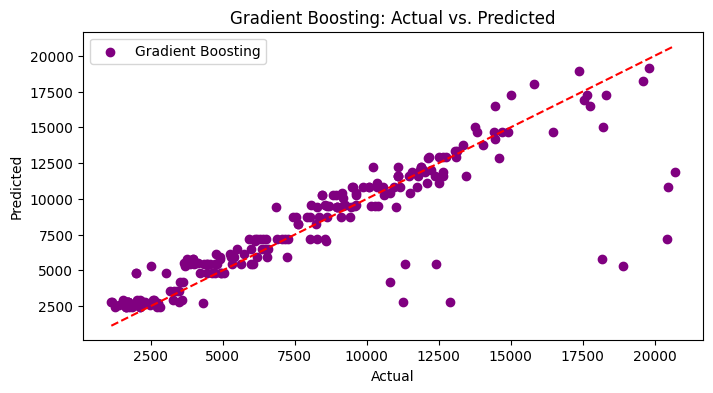

In [118]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, dt_predictions, color='green', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_predictions, color='orange', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

# Plot actual vs. predicted values for Gradient Boosting
plt.figure(figsize=(8, 4))
plt.scatter(y_test, gb_predictions, color='purple', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [125]:
# Print the evaluation metrics
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Random Forest - MSE: ", rf_mse)
print("Random Forest - MAE: ", rf_mae)
print("Gradient Boosting - MSE: ", gb_mse)
print("Gradient Boosting - MAE: ", gb_mae)

Decision Tree - MSE:  5728632.311218643
Decision Tree - MAE:  1275.0243094744608
Random Forest - MSE:  5739021.15300228
Random Forest - MAE:  1272.2645765917816
Gradient Boosting - MSE:  5620075.226137549
Gradient Boosting - MAE:  1234.9739469039018


**Feature Importance**

In [126]:
# Decision Tree
print("Decision Tree:")

# Feature importances
importance = dt_model.feature_importances_

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

print()

# Random Forest
print("Random Forest:")

# Feature importances
importance = rf_model.feature_importances_

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

print()

# Gradient Boosting
print("Gradient Boosting:")

# Feature importances
importance = gb_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Decision Tree:
age: 0.6283321204573397
smoker_encoded: 0.3716678795426604

Random Forest:
age: 0.6156421371838567
smoker_encoded: 0.3843578628161433

Gradient Boosting:
age: 0.6199252235871211
smoker_encoded: 0.3800747764128789


**Inference on sample data**

In [131]:
# Example input for prediction
new_data = pd.DataFrame({'age': [30], 'smoker_encoded': [1]})

# Decision Tree
dt_predictions = dt_model.predict(new_data)
print("Decision Tree Predictions:", dt_predictions)

# Random Forest
rf_predictions = rf_model.predict(new_data)
print("Random Forest Predictions:", rf_predictions)

# Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Decision Tree Predictions: [19323.2621875]
Random Forest Predictions: [19266.66656515]
Gradient Boosting Predictions: [18919.38558574]


In [132]:
# Example input for prediction
new_data = pd.DataFrame({'age': [35], 'smoker_encoded': [0]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [6169.09883742]


In [138]:
# Example input for prediction
new_data = pd.DataFrame({'age': [35], 'smoker_encoded': [1]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [19735.06590245]


In [152]:
# Example input for prediction
new_data = pd.DataFrame({'age': [67], 'smoker_encoded': [0]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [14685.8553561]


In [142]:
# Example input for prediction
new_data = pd.DataFrame({'age': [67], 'smoker_encoded': [1]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [19151.9711604]
